## Lesson 07
### Classification with kNN. Clustering with K-means

In [1]:
import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Sample Data

In [2]:
# y is a class label (classes 0, 1, 2)
X, y = load_iris(return_X_y=True)

# take first two features
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

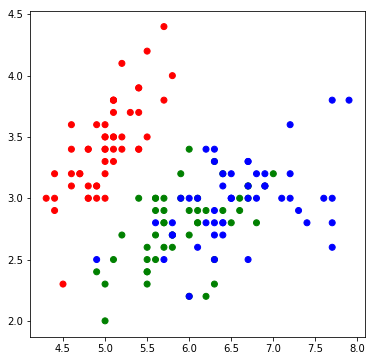

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
# Euclidean distance metric

def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
# Find k nearest neighbors

def knn(x_train, y_train, x_test, k):
    
    answers = []
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # distance from classified object to an object of train data
            distance = e_metrics(x, x_train[i])
            
            # add distance and class label for the object of train data
            test_distances.append((distance, y_train[i]))
        
        # dictionary with all classes
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # in the sorted list of distances, for first k elements count the frequency of classes
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # add most frequent class to the list
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [7]:
# Find k nearest neighbors

def knn_with_weights(x_train, y_train, x_test, k):
    
    answers = []
    
    for x in x_test:
        test_distances = []  
        test_weights = []
            
        for i in range(len(x_train)):
            
            # distance from classified object to an object of train data
            distance = e_metrics(x, x_train[i])
            
            # add distance and class label for the object of train data
            test_distances.append((distance, y_train[i]))
            
            # weight calculated as w = 1 / (d + 1e-10)
            weight = 1 / (distance + 1e-10)
            
            # add weight and class label for the object of train data
            test_weights.append((weight, y_train[i]))
        
        # dictionary with all classes
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # in the reverse sorted list of weights, for first k elements count the frequency of classes
        for w in sorted(test_weights, reverse=True)[0:k]:
            classes[w[1]] += 1
            
        # add most frequent class to the list
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-classes kNN classification with k = {k}")
    plt.show()

#### Apply Models

In [10]:
def knn_by_k_with_accuracy_visualize(k):
    
    # predict classes
    y_pred = knn_with_weights(X_train, y_train, X_test, k)
    
    # accuracy of the algorith
    print(f'k = {k}, algorithm accuracy: {accuracy(y_pred, y_test):.3f}')
    
    # visualize
    get_graph(X_train, y_train, k)

k = 2, algorithm accuracy: 0.733


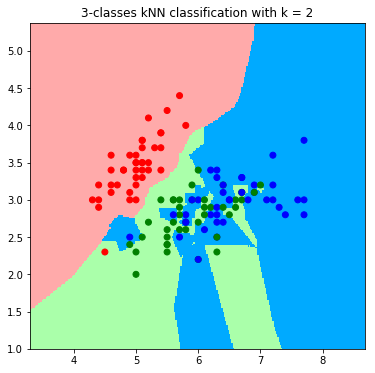

In [11]:
knn_by_k_with_accuracy_visualize(2)

k = 4, algorithm accuracy: 0.800


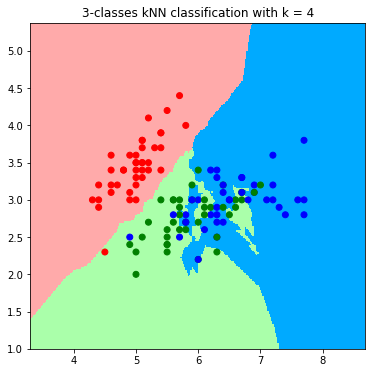

In [12]:
knn_by_k_with_accuracy_visualize(4)

k = 16, algorithm accuracy: 0.833


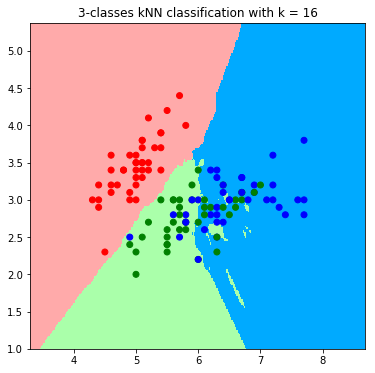

In [13]:
knn_by_k_with_accuracy_visualize(16)